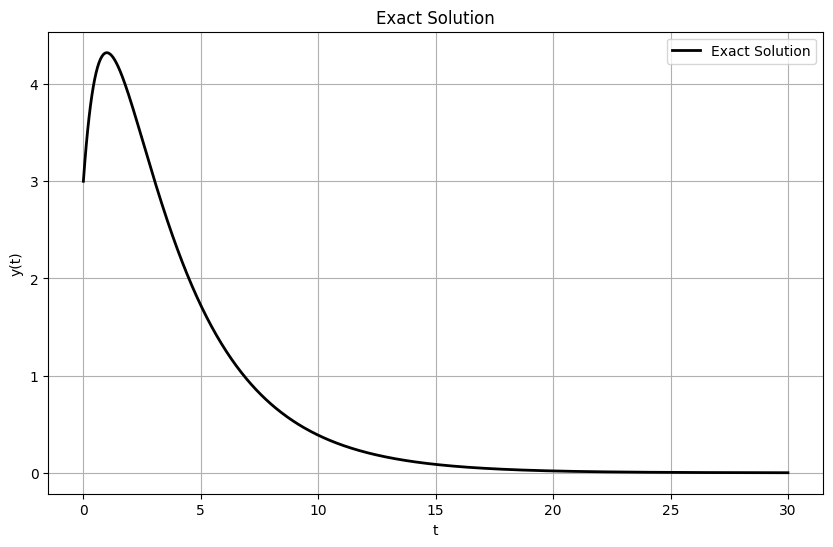

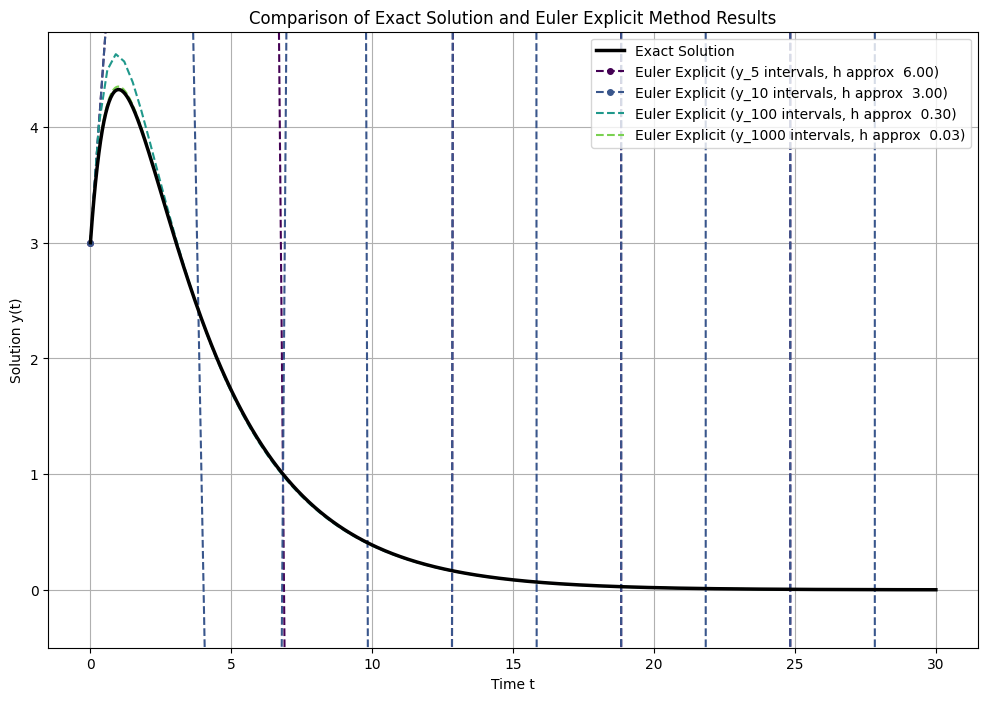

In [ ]:
#1
import numpy as np
import matplotlib.pyplot as plt

def f(t, y):
  return -1.2 * y + 7.0 * np.exp(-0.3 * t)

def y_exact(t):
  return (70.0 / 9.0) * np.exp(-0.3 * t)- (43.0 / 9.0) * np.exp(-1.2 * t)

t_start = 0
t_end = 30
y0 = 3
N_intervals = [5, 10, 100, 1000]
t_fine = np.linspace(t_start, t_end, 1000)
y_exact_values = y_exact(t_fine)

plt.figure(figsize=(10, 6))
plt.plot(t_fine, y_exact_values, label='Exact Solution', color='black', linewidth=2)
plt.title('Exact Solution')
plt.xlabel('t')
plt.ylabel('y(t)')
plt.grid(True)
plt.legend()

def euler_explicit(f, t_span, y0, N):
  t_start, t_end = t_span
  h = (t_end - t_start) / N
  t_vals = np.linspace(t_start, t_end, N +1)
  y_vals = np.zeros(N + 1)
  y_vals[0] = y0

  for i in range(N):
    y_vals[i+1] = y_vals[i] + h * f(t_vals[i], y_vals[i])
  return t_vals, y_vals

numerical_solutions = {}

for N in N_intervals:
  t_num, y_num = euler_explicit(f, (t_start, t_end), y0, N)
  numerical_solutions[N] = (t_num, y_num)

plt.figure(figsize=(12, 8))
plt.plot(t_fine, y_exact_values, label='Exact Solution', color='black', linewidth=2.5, zorder=5)
colors = plt.cm.viridis(np.linspace(0, 0.8, len(N_intervals)))

for i, N in enumerate(N_intervals):
  t_num, y_num = numerical_solutions[N]
  label = f'Euler Explicit (y_{N} intervals, h approx  {((t_end-t_start)/N):.2f})'
  plt.plot(t_num, y_num, label=label, color=colors[i], linestyle='--', marker='o', markersize=4 if N < 20 else 0)
plt.title('Comparison of Exact Solution and Euler Explicit Method Results')
plt.xlabel('Time t')
plt.ylabel('Solution y(t)')
plt.legend()
plt.grid(True)
plt.ylim(bottom=min(y_exact_values.min(), 0)-0.5, top = y_exact_values.max()+0.5)
plt.show()

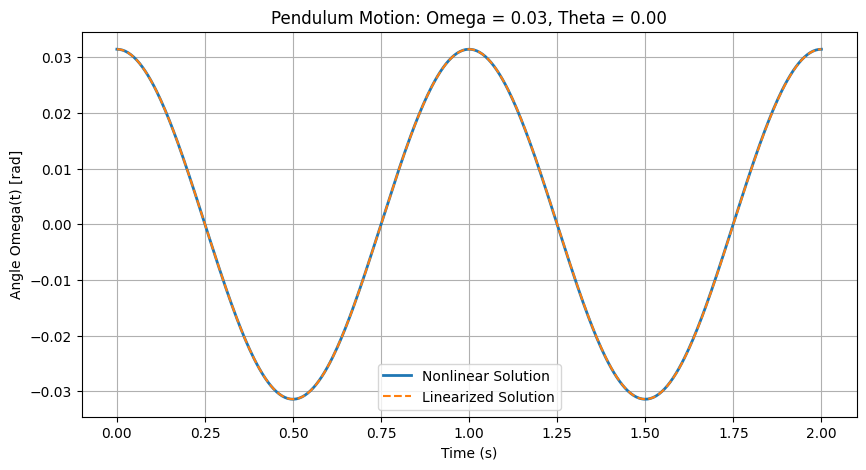

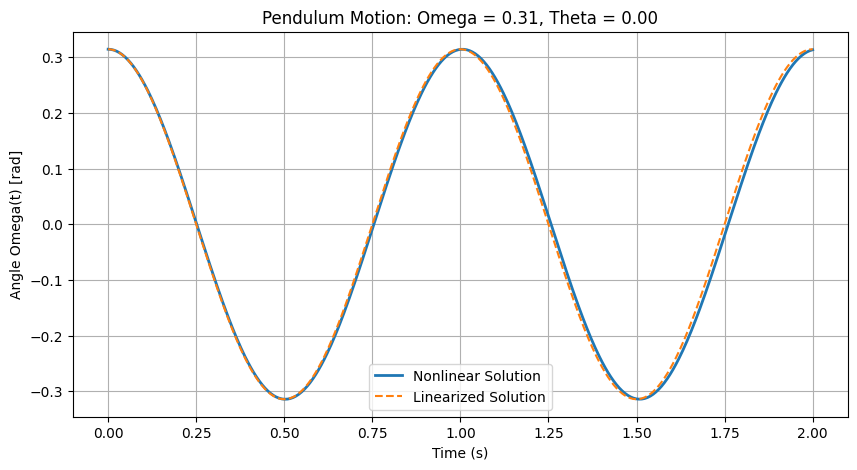

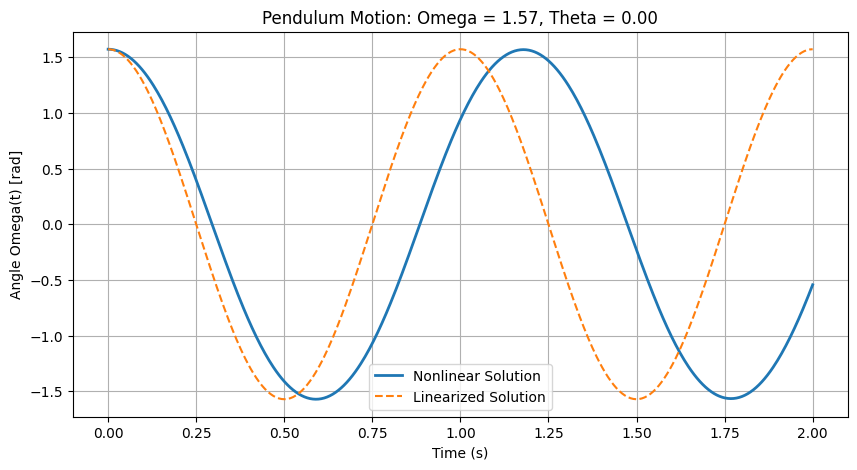

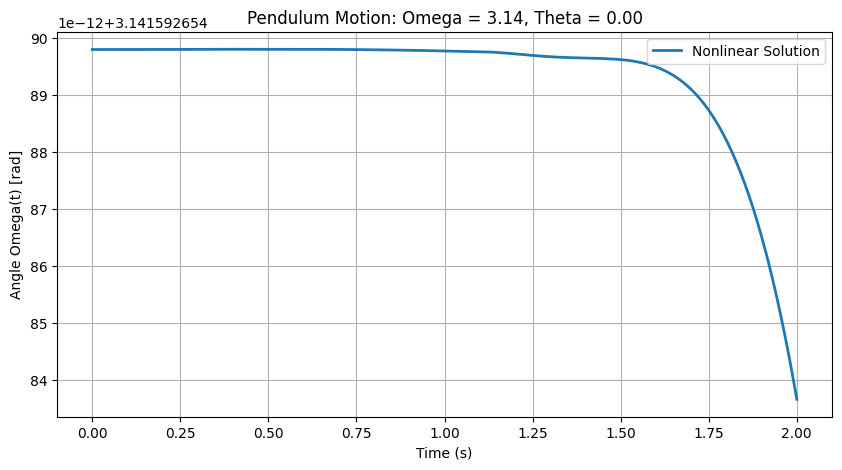

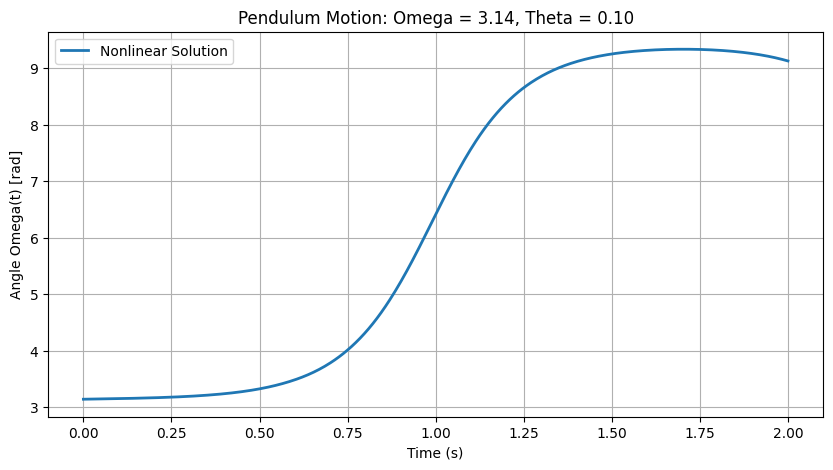

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

g = 9.81
L = g / (2 * np.pi)**2

def pendulum_system(t, y):
    theta, omega = y
    dtheta_dt = omega
    domega_dt = - (g / L) * np.sin(theta)
    return [dtheta_dt, domega_dt]

def linearized_solution(t, A):
    return A * np.cos(np.sqrt(g / L) * t)

def solve_and_plot(A, B, label, compare_linear=True):
    y0 = [A, B]
    t_span = (0, 2)
    t_eval = np.linspace(t_span[0], t_span[1], 500)

    sol = solve_ivp(pendulum_system, t_span, y0, t_eval=t_eval, method='RK45')

    plt.figure(figsize=(10, 5))
    plt.plot(sol.t, sol.y[0], label='Nonlinear Solution', linewidth=2)

    if compare_linear:
        theta_lin = linearized_solution(sol.t, A)
        plt.plot(sol.t, theta_lin, label='Linearized Solution', linestyle='--')

    plt.title(f'Pendulum Motion: Omega = {A:.2f}, Theta = {B:.2f}')
    plt.xlabel('Time (s)')
    plt.ylabel('Angle Omega(t) [rad]')
    plt.legend()
    plt.grid(True)
    plt.show()

solve_and_plot(A=np.pi/100, B=0, label='A = pi/100, B = 0')
#It is a good match as they are identical

solve_and_plot(A=np.pi/10, B=0, label='A =pi/10, B = 0')
#Still slightly applies

solve_and_plot(A=np.pi/2, B=0, label='A =pi/2, B = 0')
#It does not apply

solve_and_plot(A=np.pi, B=0, label='A = pi, B = 0', compare_linear=False)
#It should stay balanced

solve_and_plot(A=np.pi, B=0.1, label='A = pi, B = 0.1', compare_linear=False)
#the pendulum will fall from the unstable equilibrium